# Initial Data Exploration

This notebook is used to carry out some exploratory analysis on a dataset of games available on Steam.

We start by loading the data.

In [59]:
# Import helper functions to load data
import sys
import os

sys.path.insert(1, os.path.abspath('..'))

from SteamAnalysis.load_data import load_steam_data

# Load data
games = load_steam_data()
games.head(10)

,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,...,discount,ccu,date,genre,tag1,tag2,tag3,tag4,tag5,year
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,Valve,Valve,NaN,231572,6056,0,"10,000,000 .. 20,000,000",10838,574,...,0.0,12717,2000-11-01,Action,Action,FPS,Multiplayer,Shooter,Classic,2000.0
20,Team Fortress Classic,Valve,Valve,NaN,7126,1086,0,"5,000,000 .. 10,000,000",245,0,...,0.0,70,1999-04-01,Action,Action,FPS,Multiplayer,Classic,Hero Shooter,1999.0
30,Day of Defeat,Valve,Valve,NaN,6133,668,0,"5,000,000 .. 10,000,000",236,6,...,0.0,69,2003-05-01,Action,FPS,World War II,Multiplayer,Shooter,Action,2003.0
40,Deathmatch Classic,Valve,Valve,NaN,2454,517,0,"5,000,000 .. 10,000,000",48,1,...,0.0,6,2001-06-01,Action,Action,FPS,Classic,Multiplayer,Shooter,2001.0
50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,21210,1078,0,"2,000,000 .. 5,000,000",346,0,...,0.0,118,1999-11-01,Action,FPS,Action,Classic,Sci-fi,Singleplayer,1999.0
60,Ricochet,Valve,Valve,NaN,4661,1006,0,"5,000,000 .. 10,000,000",32,0,...,0.0,5,2000-11-01,Action,Action,FPS,Multiplayer,Classic,First-Person,2000.0
70,Half-Life,Valve,Valve,NaN,123432,4416,0,"10,000,000 .. 20,000,000",706,64,...,0.0,1047,1998-11-08,Action,FPS,Classic,Singleplayer,1990's,Multiplayer,1998.0
80,Counter-Strike: Condition Zero,Valve,Valve,NaN,22806,2169,0,"5,000,000 .. 10,000,000",1617,11,...,0.0,377,2004-03-01,Action,Action,FPS,Shooter,Multiplayer,First-Person,2004.0
130,Half-Life: Blue Shift,Gearbox Software,Valve,NaN,15055,1291,0,"2,000,000 .. 5,000,000",154,0,...,0.0,64,2001-06-01,Action,FPS,Action,Sci-fi,Singleplayer,Shooter,2001.0


We have various data on games, including basic metadata (name, publisher, release date, genres and tags), number of owners in a range, and usage stats (average/median playtime, peak users yesterday - ccu).

Let's look at the data types:

In [60]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68484 entries, 10 to 3005110
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             68476 non-null  object        
 1   developer        68244 non-null  object        
 2   publisher        68352 non-null  object        
 3   score_rank       34 non-null     float64       
 4   positive         68484 non-null  int64         
 5   negative         68484 non-null  int64         
 6   userscore        68484 non-null  int64         
 7   owners           68484 non-null  category      
 8   average_forever  68484 non-null  int64         
 9   average_2weeks   68484 non-null  int64         
 10  median_forever   68484 non-null  int64         
 11  median_2weeks    68484 non-null  int64         
 12  price            68483 non-null  float64       
 13  initialprice     68483 non-null  float64       
 14  discount         68483 non-null  float64

We will start by looking through the distributions of some key variables. We begin with number of owners

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


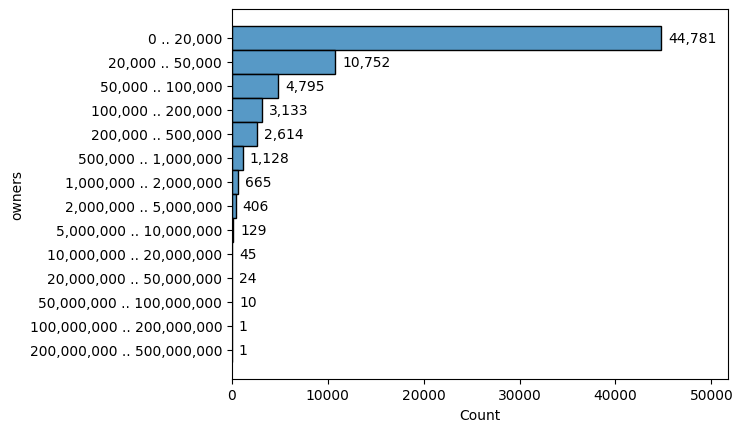

In [5]:
import seaborn as sns

# Create histogram
ax = sns.histplot(data=games, y="owners")

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", padding=5)

# Increase x limit to fit labels
_ = ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1]*1.1)

We can see that the vast majority of games have below 20,000 owners, with decreasing numbers of games in each larger size bucket. There are a handful of individual games in the largest owners buckets.

Now looking at the tags, let's have a look at the frequencies

<Axes: >

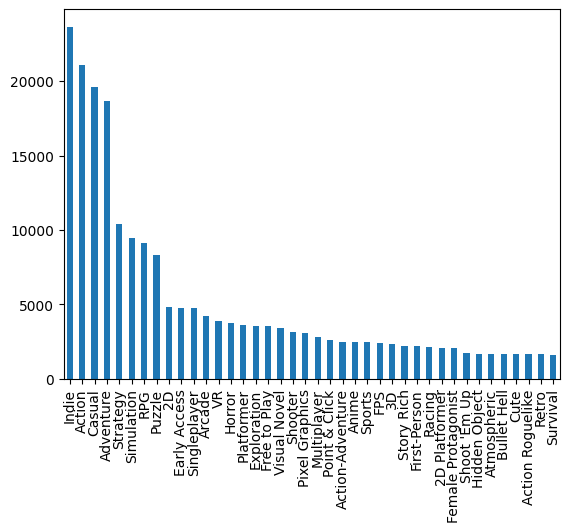

In [6]:
games.filter(like="tag").stack().value_counts()[:40].plot.bar()

A couple of observations:
* The top 4 tags are very frequent, then there is a steep drop to the next four, another steep drop and then a much more gradual progression.
* Most tags describing the genre or gameplay ('action', 'strategy', 'platformer'), but some describe other meta characteristics, graphical style, business model, or just vibes ('VR', 'Pixel Graphics', 'Indie', 'Early access', 'Cute')

Finally, let's look at release dates:

Text(0, 0.5, 'Number of games released')

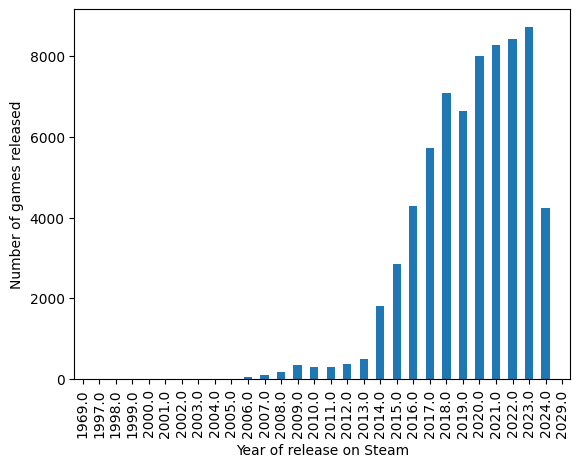

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

games.dropna(subset='year', inplace=True)
games.groupby(games['year'])['name'].count().plot(kind = 'bar', ax=ax)

# Label axes
plt.xlabel("Year of release on Steam")
plt.ylabel("Number of games released")


Steam launched in 2003, and opened up to third party games in 2005. But we can see that the number of games being release on Steam really started taking off in 2014, and has accelerated signfiicantly since.

# Tags over time

In [8]:
# Make a table of tag rank by year
all_tags = pd.concat([games['year'], games.filter(like="tag")], axis=1)
all_tags = all_tags.melt(id_vars='year', ignore_index=False, value_name='tag').drop(columns='variable')

tags_per_year = all_tags.groupby('year').value_counts()
tag_ranks_per_year = tags_per_year.groupby(level='year').rank(ascending=False, method='min')
tag_ranks_per_year.name = 'rank'

tag_ranks_per_year = pd.DataFrame(tag_ranks_per_year).reset_index()

In [9]:
top_5_tags_2023 = tag_ranks_per_year[(tag_ranks_per_year['year'] == 2023) & (tag_ranks_per_year['rank'] <= 5)]['tag'].values
top_100_tags_2023 = tag_ranks_per_year[(tag_ranks_per_year['year'] == 2023) & (tag_ranks_per_year['rank'] <= 100)]['tag'].values

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


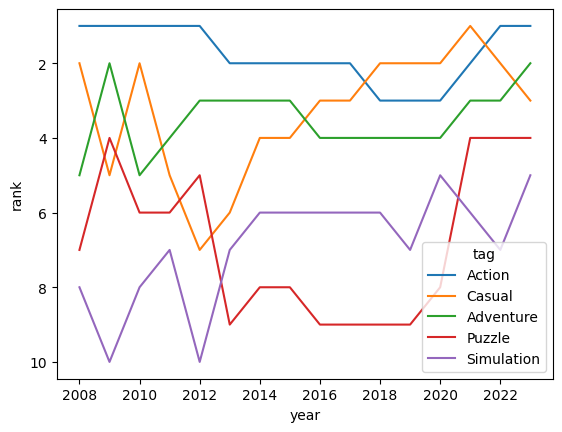

In [10]:
# Filter a DF that has the rank history for the top 5 tags in 2023
top_5_tags_history = tag_ranks_per_year.query(
    "2008 <= year <= 2023 and tag in @top_5_tags_2023"
)

# Line chart showing evolution over time
g = sns.lineplot(
    data = top_5_tags_history,
    x = 'year',
    y = 'rank',
    hue = 'tag'
)

_ = g.invert_yaxis()

There is some amount of variability over time, but it isn't huge - action, casual and adventure stay within the top 5 throughout the period, and puzzle and simulation drift more but remain in the top 10.

To explore more than just the top 5, we'll use Plotly for an interactive plot that lets us pick which tags to draw out from the mass. Inspiration taken from the UK Office for National Statistics visualiser for baby name popularity: https://www.ons.gov.uk/visualisations/dvc363/babyindex.html

In [30]:
import plotly.express as px
import plotly.graph_objects as go

top_100_tags_history = tag_ranks_per_year.query(
    "2008 <= year <= 2023 and rank <= 100"
)

tag_list = top_100_tags_history['tag'].unique()

# Set up a figure for the line chart
fig = go.Figure()

# Add a line for each tag - greyed out by default
for tag in tag_list:
    fig.add_trace(go.Scatter(
        x=top_100_tags_history[top_100_tags_history['tag']==tag]['year'],
        y=top_100_tags_history[top_100_tags_history['tag']==tag]['rank'],
        name=tag,
        mode='lines',
        connectgaps = False,
        line_color='#e0e0e0',
        line_width=0.5,
        hovertemplate= f'{tag}<extra></extra>',
        showlegend=False
    ))

# Configure titlte and layout options
fig.update_layout(
    title='Tag popularity over time',
    showlegend=True,
    margin_l=20, margin_b=20,
    height=500,
    paper_bgcolor = 'white',
    plot_bgcolor = 'white'
)

# Reverse the y axis (so top-ranked on top)
fig.update_yaxes(autorange='reversed')

# Convert to a figure widget to enable click events
fw = go.FigureWidget(fig)

# Set up dictionary for tracking which lines are active
active_lines = {trace.name: False for trace in fw.data}
active_n = 0

# Set up colour pallete
palette = px.colors.qualitative.Plotly.copy()

# Define click function to toggle clicked lines
def toggle_line(trace, points, selector):
    # Give function access to active_n variable outside of function scope
    global active_n
    
    # Skip when point clicked was outside trace
    if not points.point_inds:
        return
    
    # Toggle 
    if trace.showlegend:
        # Deactivate
        palette.insert(0, trace.line.color) # return line colour to the palette
        trace.line.color = '#e0e0e0'
        trace.showlegend = False
        trace.zorder = 1
        trace.mode = 'lines'
        trace.line.width = 0.5
        active_n -= 1
    else:
        # activate
        trace.line.color = palette.pop(0)
        trace.showlegend = True
        trace.zorder = 20
        trace.mode = 'lines+markers'
        trace.line.width = 2
        active_n +=1
        
for trace in fw.data:
    trace.on_click(toggle_line)
fw

FigureWidget({
    'data': [{'connectgaps': False,
              'hovertemplate': 'Action<extra></extra>',
              'line': {'color': '#e0e0e0', 'width': 0.5},
              'mode': 'lines',
              'name': 'Action',
              'showlegend': False,
              'type': 'scatter',
              'uid': '50945f6e-e938-47a6-a168-18d11d701d60',
              'x': array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
                          2018., 2019., 2020., 2021., 2022., 2023.]),
              'y': array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 2., 1., 1.])},
             {'connectgaps': False,
              'hovertemplate': 'Casual<extra></extra>',
              'line': {'color': '#e0e0e0', 'width': 0.5},
              'mode': 'lines',
              'name': 'Casual',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'aa6376fe-53aa-4685-b980-3ca2a05173e2',
              'x': array([2008., 2009., 20